In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
npload = np.load('ising.npz')

In [4]:
mx_result = npload['mx_result']

In [5]:
mz_result = npload['mz_result']

In [6]:
j_grid = npload['j_grid']

In [7]:
h_grid = npload['h_grid']

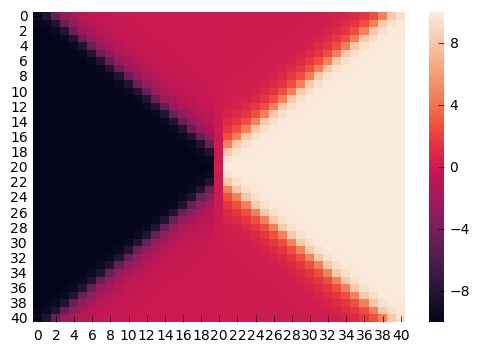

In [8]:
sns.heatmap(mx_result); plt.show()

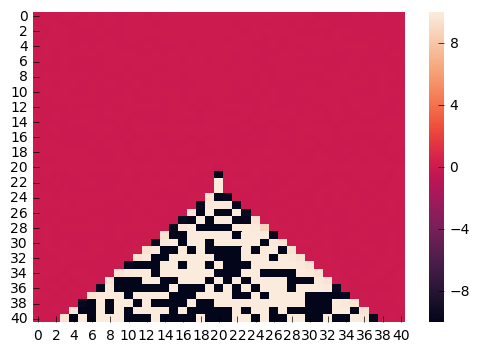

In [9]:
sns.heatmap(mz_result); plt.show()

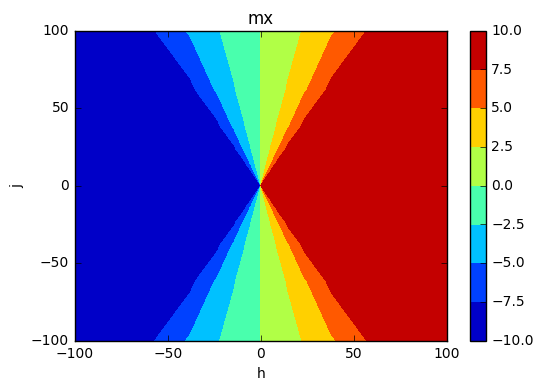

In [13]:
plt.contourf(j_grid, h_grid, mx_result); 
plt.xlabel('h')
plt.ylabel('j')
plt.title('mx')
plt.colorbar()
plt.show()

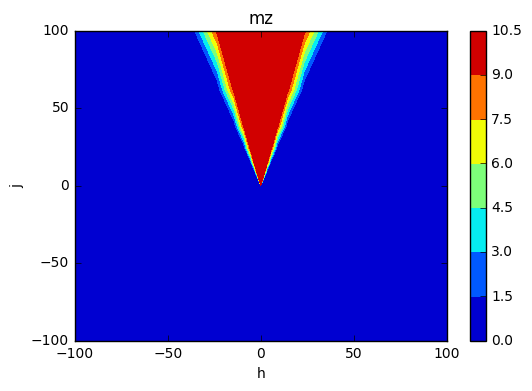

In [14]:
plt.contourf(j_grid, h_grid, np.abs(mz_result)); 
plt.xlabel('h')
plt.ylabel('j')
plt.title('mz')
plt.colorbar()
plt.show()

In [15]:
j_grid[31]

1.2742749857031335

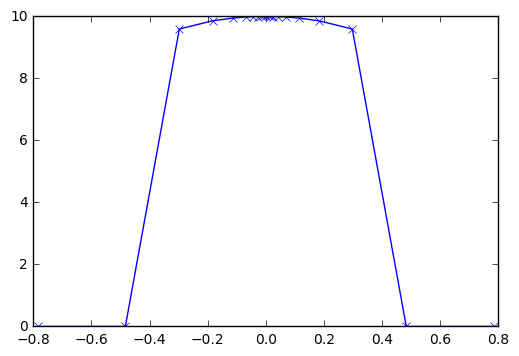

In [83]:
plt.plot(h_grid[10:31], np.abs(mz_result[31, 10:31]), 'x-'); plt.show()